# <center>Building Machine Learning Models to Predict Credit Card Fraud</center>

This machine learning project is focused on building an effective model to help detect fraudulent credit card transactions. The goal of this project is to explore the given dataset, perform the necessary visualisations to understand the dataset, scale the features provided in the dataset, build machine learning models for classifying transactions, and comparing the models.

## The Dataset

This project utilises dataset comprising 1 million credit card transaction records, with each entry labelled as either fraudulent or non-fraudulent. The dataset is openly available on <a href = "https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud">Kaggle</a>.

## Exploratory Data Analysis and Visualisation

Import the required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

To understand the data, we need to first import and read the data.
To follow along, you can also download this data set from Kaggle at https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud

In [2]:
df = pd.read_csv(r"\Users\kanwi\OneDrive\Desktop\IBM Data Science Professional\card_transdata.csv", sep = ",")
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


Looks like there are 7 features and 1 target variable (i.e. whether the transaction is fraudulent or not).


| Column Name | Description | Feature or Target Variable |
|:-----------:|:-----------:|:--------------------------:|
| distance_from_home | The distance from home where the transaction happened | Feature |
| distance_from_last_transaction |  The distance from last transaction happened | Feature |
| ratio_to_median_purchase_price | Ratio of transaction to the median purchase price | Feature |
| repeat_retailer | Whether transaction is with a repeat retailer | Feature |
| used_chip | Whether the transaction occurred using chip (credit card) | Feature |
| used_pin_number | Whether the transaction occurred with a pin number | Feature |
| online_order | Whether the transaction was an online transaction | Feature |
| fraud | A label of whether the transaction is fraudulent or not | Target Variable |


Now that we have an idea of what columns are in the dataset, let's find out more about our dataset using the describe() method.

In [3]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
print(df.dtypes)

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object


1 million entries may take up too much computing power on my humble Asus laptop.

Let's truncate the data and work with 10,000 entries.

In [5]:
df2 = df.loc[0:9999]
df2.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,26.374744,4.807107,1.824164,0.879000,0.350800,0.104800,0.641500,0.084100
std,58.811106,22.260124,2.762438,0.326144,0.477244,0.306311,0.479584,0.277552
min,0.049270,0.000930,0.011373,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.808606,0.305219,0.489052,1.000000,0.000000,0.000000,0.000000,0.000000
50%,10.026888,1.006459,1.005754,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.866217,3.313696,2.091252,1.000000,1.000000,0.000000,1.000000,0.000000
max,2033.498174,990.070315,65.150879,1.000000,1.000000,1.000000,1.000000,1.000000


Looking good so far. Let's check if there is a need to clean the data. I am not sure if there are any empty values in the dataset.

In [6]:
df2.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

All clear! There are no null values in our dataset. Looks like the data came clean, so there is not much we need to do to process the data further.

Now, let's visualise our data. One of the interesting feature I want to explore is distance_from_home. The hypothesis is that if the transaction happens further away from home, it is more likely that the transaction is fraudulent. That is because fraudulent transactions are likely to occur due to scammers that are based overseas. We'll use a frequency plot to plot distance_from_home, with fraud as the hue.

<Figure size 1440x2160 with 0 Axes>

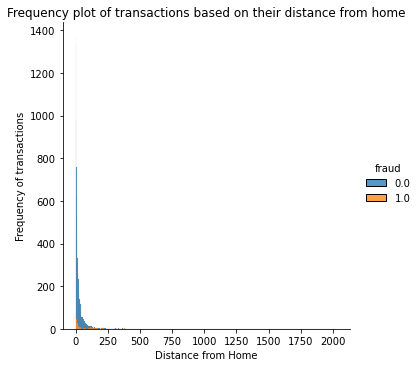

In [7]:
sns.set_style = "whitegrid"
plt.figure(figsize=(20,30))

sns.displot(data = df2, x="distance_from_home", hue="fraud", multiple = "stack")
plt.xlabel("Distance from Home")
plt.ylabel("Frequency of transactions")
plt.title("Frequency plot of transactions based on their distance from home")
plt.show()

By visually inspecting the chart, we can see that fraudulent transactions tend to happen further away from home - there appears to be a little bit more "orange" on the right side of the chart.

However, this relationship is not very clear. We will require further analysis to determine if there is a correlation between distance_from_home and fraudulent transactions.

Also, notice that there are a lot more non-fraudulent transactions compared to fraudulent transactions. To be exact, only 8.41% of the 10,000 transactions are fraudulent.

In [8]:
print("Percentage of transactions that are fraudulent = ", df2["fraud"].sum() / df2["fraud"].count() * 100, "%")

Percentage of transactions that are fraudulent =  8.41 %


Next, I'll make a boxplot to see if there is a difference in the spread of distance from home in fraudulent vs non-fraudulent transactions.

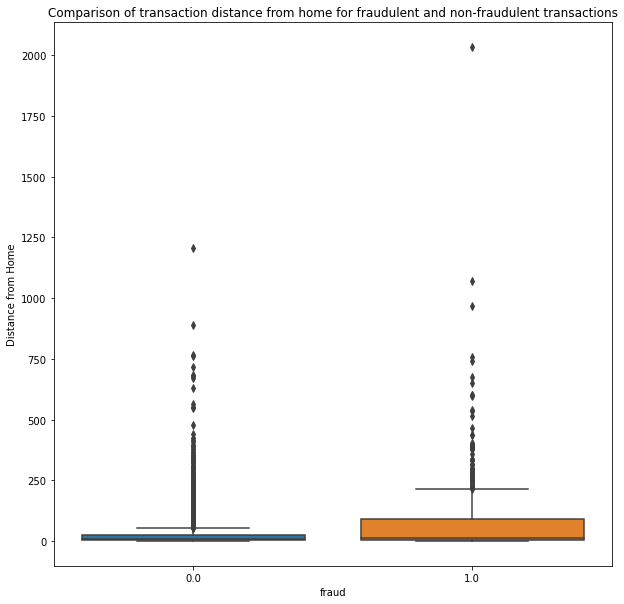

In [9]:
sns.set_style = "whitegrid"
plt.figure(figsize=(10,10))

sns.boxplot(data = df2, x="fraud", y ="distance_from_home")
plt.ylabel("Distance from Home")
plt.title("Comparison of transaction distance from home for fraudulent and non-fraudulent transactions")
plt.show()

Looking at the boxplot, we can see that there are a number of outliers in both fraudulent and non-fraudulent transactions. However, we can see that the interquartile range of distance_from_home for fraudulent transactions is wider than that for non-fraudulent transactions.

In other words, fraudulent transactions have a wider spread of values in terms of the transactions' distance from home.

To get a better idea of how the features are correlated, let's do a quick check on the correlation between the various features and the target variable.

Even better, let's do a heatmap.

In [10]:
df2.corr()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,-0.007818,-0.011728,0.159345,-0.003907,0.009682,-0.004010,0.195015
distance_from_last_transaction,-0.007818,1.000000,0.013426,0.003432,-0.010870,-0.000533,0.016498,0.109744
ratio_to_median_purchase_price,-0.011728,0.013426,1.000000,0.001640,0.016197,0.005871,-0.004465,0.436470
repeat_retailer,0.159345,0.003432,0.001640,1.000000,0.004798,-0.005198,0.010368,-0.001369
used_chip,-0.003907,-0.010870,0.016197,0.004798,1.000000,-0.010015,-0.003663,-0.070989
used_pin_number,0.009682,-0.000533,0.005871,-0.005198,-0.010015,1.000000,-0.012453,-0.101327
online_order,-0.004010,0.016498,-0.004465,0.010368,-0.003663,-0.012453,1.000000,0.204738
fraud,0.195015,0.109744,0.436470,-0.001369,-0.070989,-0.101327,0.204738,1.000000


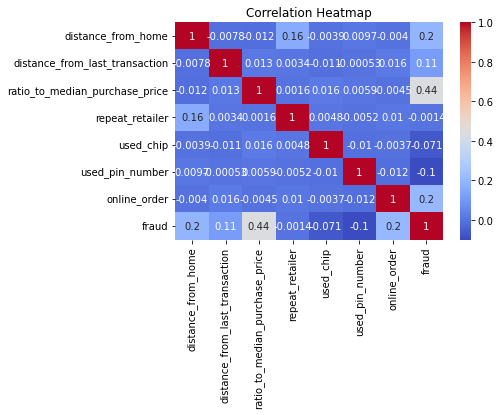

In [11]:
sns.heatmap(df2.corr(),annot=True,cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Looking at the heatmap, it appears that the feature with the strongest correlation to fraud is ratio_to_median_purchase_price.

The Pearson R correlation is 0.44. It is a positive correlation, meaning transactions with a larger ratio to median purchase price is more likely to be fraudulent.

distance_from_home and online_order seems to matter too, albeit somewhat less prominent than ratio_to_median_purchase_price. The correlation of both features with the target variable is both at 0.2.

None of the features are strongly correlated with each other. This is a good thing because multicollinearity may undermine the performance of our machine learning models

## Building Machine Learning Models for Prediction

Now that we have explored our data a little bit, let's build two machine learning models for the purposes of prediction.

We will first build a logistic regression model, followed by a random forest classifier regression model. We will then compare which is the better model for classifying fraudulent transactions.

### Feature Scaling and Splitting Dataset

First, import the libraries for Machine Learning.

In [12]:
from sklearn.preprocessing import StandardScaler #for scaling our features so that disparity in scales of the features do not distort our model
from sklearn.model_selection import train_test_split #helps to split our datasets into training and testing sets
from sklearn.linear_model import LogisticRegression #scikit learn library for Logistic Regression Model
from sklearn.ensemble import RandomForestClassifier #scikit learn library for Random Forest Classifier Model
from sklearn.metrics import confusion_matrix, classification_report #metrics for measuring accuracy of our models

Define the X and y variables.

In [13]:
X = df2[["distance_from_home","distance_from_last_transaction","ratio_to_median_purchase_price","repeat_retailer","used_chip","used_pin_number","online_order"]]
y = df2["fraud"]

Split the data set into training and testing data using train_test_split.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

Create a scaler object to apply standard scaling later on in modelling.

To ensure the integrity of our test dataset, we will scale and transform our train and test dataset separately to prevent information leakage into our test dataset. 

In [15]:
scaler = StandardScaler()

### Creating and Evaluating a Logistic Regression Model

Let's create a model using Logistic Regression. Since we are dealing with a classification problem which is binary in nature, logistic regression is more suitable for this purpose than a linear regression model.

In [16]:
model1 = LogisticRegression()

In [17]:
model1.fit(scaler.fit_transform(X_train), y_train)

LogisticRegression()

In [18]:
y_pred1 = model1.predict(scaler.transform(X_test))

In [19]:
cm1 = confusion_matrix(y_test, y_pred1)

print("Confusion Matrix for Logistic Regression Model")
print(cm1)

report1 = classification_report(y_test, y_pred1)

print("\n")

print("Classification Report for Logistic Regression Model")
print(report1)

Confusion Matrix for Logistic Regression Model
[[2727   17]
 [ 109  147]]


Classification Report for Logistic Regression Model
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      2744
         1.0       0.90      0.57      0.70       256

    accuracy                           0.96      3000
   macro avg       0.93      0.78      0.84      3000
weighted avg       0.96      0.96      0.95      3000



Looks like our Logistic Regression model isn't performing that well! While we are able to correctly point out most instances of genuine transactions, we are not so great at catching fraudulent transactions.

A recall rate of 0.57 for fraudulent transactions means that we are only catching 57% of all fraudulent transactions. Many of the fraudulent transactions (109) will remain undetected if we rely on this model.

### Logistic Regression - Feature Selection

As discussed earlier, the correlation heatmap shows that not all features are equally correlated with the target variable. This may be the cause of the poor performance of our logistic regression model.

To improve the performance of our logistic regression model, we should consider selecting only the most relevant features, and build our model based on these features.

#### Feature Selection by Examining Pearson R Correlation

One intuitive way to select features is to examine the correlation values of the features with the target variable. We should then omit features that have very low correlations with the target variable in our logistic regression model.

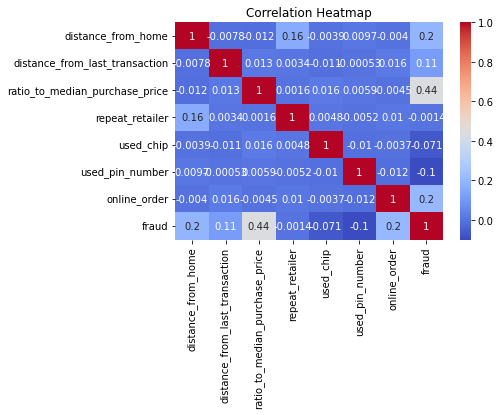

In [20]:
#Let's look at our correlation heatmap again
sns.heatmap(df2.corr(),annot=True,cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Looking at the heatmap, three features have a correlation of 0.2 or higher with the target variable:
- distance_from_home
- ratio_to_median_purchase_price
- online_order

We will include only these three features and see if we can improve the model.

In [22]:
X = df2[["distance_from_home","ratio_to_median_purchase_price","online_order"]]
y = df2["fraud"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

#create a scaler object

scaler = StandardScaler()

In [23]:
model2 = LogisticRegression()

In [24]:
model2.fit(scaler.fit_transform(X_train), y_train)

LogisticRegression()

In [25]:
y_pred2 = model2.predict(scaler.transform(X_test))

In [26]:
cm2 = confusion_matrix(y_test, y_pred2)

print("Confusion Matrix for Logistic Regression Model - Only 3 Features")
print(cm2)

report2 = classification_report(y_test, y_pred2)

print("\n")

print("Classification Report for Logistic Regression Model - Only 3 Features")
print(report2)

Confusion Matrix for Logistic Regression Model - Only 3 Features
[[2724   20]
 [ 150  106]]


Classification Report for Logistic Regression Model - Only 3 Features
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      2744
         1.0       0.84      0.41      0.55       256

    accuracy                           0.94      3000
   macro avg       0.89      0.70      0.76      3000
weighted avg       0.94      0.94      0.93      3000



Unfortunately, the model did not improve after we selected only 3 features. Let's try another method for feature selection - Lasso regularisation.

#### Feature Selection Using Lasso regularisation

Instead of examining and removing features manually, let us use Lasso to select the most relevant features for us. 

Import additional libraries for Lasso Regularisation

In [86]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

Define our features and variables. Perform train-test-split and scale our data as usual.

In [87]:
#Define the features and target variable

X = df2[["distance_from_home","distance_from_last_transaction","ratio_to_median_purchase_price","repeat_retailer","used_chip","used_pin_number","online_order"]]
y = df2["fraud"]

#Perform our train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

#Fit our scaler object to the X_train data set. The scaler object will be used in later steps to transform our datasets
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

Create a selector object and select features for our model using Lasso regularisation.

This process reduces the coefficient of some factors to 0, essentially omitting them from our regression model.

In [88]:
sel_ = SelectFromModel(LogisticRegression(C=0.5, penalty='l2', solver='liblinear', random_state=10))
sel_.fit(scaler.transform(X_train), y_train)

SelectFromModel(estimator=LogisticRegression(C=0.5, random_state=10,
                                             solver='liblinear'))

The next cell tells us which features have been selected by our Lasso regularisation process.

The following 3 features were selected for our model:
- ratio_to_median_purchase_price
- used_pin_number
- online_order

In [89]:
# Get the feature indices of the selected features

selected_feature_indices = sel_.get_support()

print(selected_feature_indices)

# Get the names of the selected features

selected_feature_names = X.columns[selected_feature_indices]

print("Selected Features:")
print(selected_feature_names)

[False False  True False False  True  True]
Selected Features:
Index(['ratio_to_median_purchase_price', 'used_pin_number', 'online_order'], dtype='object')


Transform the training and testing sets to select the relevant features.

In [90]:
X_train_selected = sel_.transform(scaler.transform(X_train))
X_test_selected = sel_.transform(scaler.transform(X_test))

Train the logistic regression model on the selected features.

In [91]:
model3 = LogisticRegression()

In [92]:
model3.fit(X_train_selected, y_train)

LogisticRegression()

In [93]:
#We will now use the fitted model to make a prediction on the test data set, and check it's performance

y_pred3 = model3.predict(X_test_selected)

In [94]:
cm3 = confusion_matrix(y_test, y_pred3)

print("Confusion Matrix for Logistic Regression Model - Only 1 Feature selected by Lasso")
print(cm3)

report3 = classification_report(y_test, y_pred3)

print("\n")

print("Classification Report for Logistic Regression Model - Only 1 Feature selected by Lasso")
print(report3)

Confusion Matrix for Logistic Regression Model - Only 1 Feature selected by Lasso
[[2736    8]
 [ 135  121]]


Classification Report for Logistic Regression Model - Only 1 Feature selected by Lasso
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      2744
         1.0       0.94      0.47      0.63       256

    accuracy                           0.95      3000
   macro avg       0.95      0.73      0.80      3000
weighted avg       0.95      0.95      0.95      3000



Looks like the performance has slightly deproved in comparison with our first logistic regression model! Perhaps, we should try another supervised machine learning algorithm for our dataset.

If we are curious about the mathematical formula behind our logistic regression model, we can also print the coefficients and intercept of our model.

In [95]:
coefficients = model3.coef_
intercept = model3.intercept_

# Print the coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [[ 1.80117822 -3.04711803  3.52540939]]
Intercept: [-5.86896321]


### Creating and Evaluating a Random Forest Classifier Model

Let's build a second model using the Random Forest Classifier algorithm.

We first conduct our usual train-test split and scaling.

In [96]:
#Define the features and target variable

X = df2[["distance_from_home","distance_from_last_transaction","ratio_to_median_purchase_price","repeat_retailer","used_chip","used_pin_number","online_order"]]
y = df2["fraud"]


#Perform our train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

scaler = StandardScaler()

In [97]:
rf_classifier = RandomForestClassifier()

In [98]:
rf_classifier.fit(scaler.fit_transform(X_train), y_train)

RandomForestClassifier()

In [99]:
y_pred4 = rf_classifier.predict(scaler.transform(X_test))

In [103]:
cm4 = confusion_matrix(y_test, y_pred4)

print("Confusion Matrix for Random Forest Classifier Model")
print(cm4)

report = classification_report(y_test, y_pred4)

print("\n")

print("Classification Report for Random Forest Classifier Model")
print(report)

Confusion Matrix for Random Forest Classifier Model
[[2744    0]
 [   5  251]]


Classification Report for Random Forest Classifier Model
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2744
         1.0       1.00      0.98      0.99       256

    accuracy                           1.00      3000
   macro avg       1.00      0.99      0.99      3000
weighted avg       1.00      1.00      1.00      3000



The random forest classifier model is much better compared to the logistic regression model!

The model has accurately classified all instances of genuine transactions as non-fraudulent.

At the same time, the model caught 98% of all fraudulent transactions! Only 5 fraudulent transactions remain undetected when using this model.

The f1-score is a harmonic mean of the precision and recall rate that helps us understand the performance of the model. While the best variation of our logistic regression model scores a respectible f1-score of 0.98 for non-fraudulent transactions, the f1-score for fraudulent transactions is lower at 0.70.

Comparatively, the random forest classifier is superior here. The f1-scores (1.00 for non-fraudulent transactions and 0.99 for fraudulent transactions) indicates that the random forest classifier model outperforms the logistic regression model.

## Conclusion

This project is a simple exercise for me to demonstrate my data science and machine learning skills. Being able to leverage technology to detect and prevent fraud has always been an area of interest for me, and I am glad that I now have this ability to do so. I hope you had as much fun reading this as I had working on this project!

<b>Author</b> - Royston Kan

<b>Date</b> - 8 July 2023